In [259]:
#https://www.kaggle.com/code/wangqiyuan/extensive-eda-analysis-on-tesla-stock-data
#https://www.kaggle.com/code/saisaran2/tesla-stock-eda
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

In [260]:
data=pd.read_csv('TSLA.csv') 

In [261]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [262]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [263]:
data.describe().round(3)

,Open,High,Low,Close,Adj Close,Volume
count,2416.000,2416.000,2416.000,2416.000,2416.000,2.416000e+03
mean,186.271,189.578,182.917,186.404,186.404,5.572722e+06
std,118.740,120.892,116.858,119.136,119.136,4.987809e+06
min,16.140,16.630,14.980,15.800,15.800,1.185000e+05
25%,34.342,34.898,33.588,34.400,34.400,1.899275e+06
50%,213.035,216.745,208.870,212.960,212.960,4.578400e+06
75%,266.450,270.928,262.103,266.775,266.775,7.361150e+06
max,673.690,786.140,673.520,780.000,780.000,4.706500e+07


In [264]:
data['Date']=pd.to_datetime(data['Date'])

In [265]:
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [266]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,2010


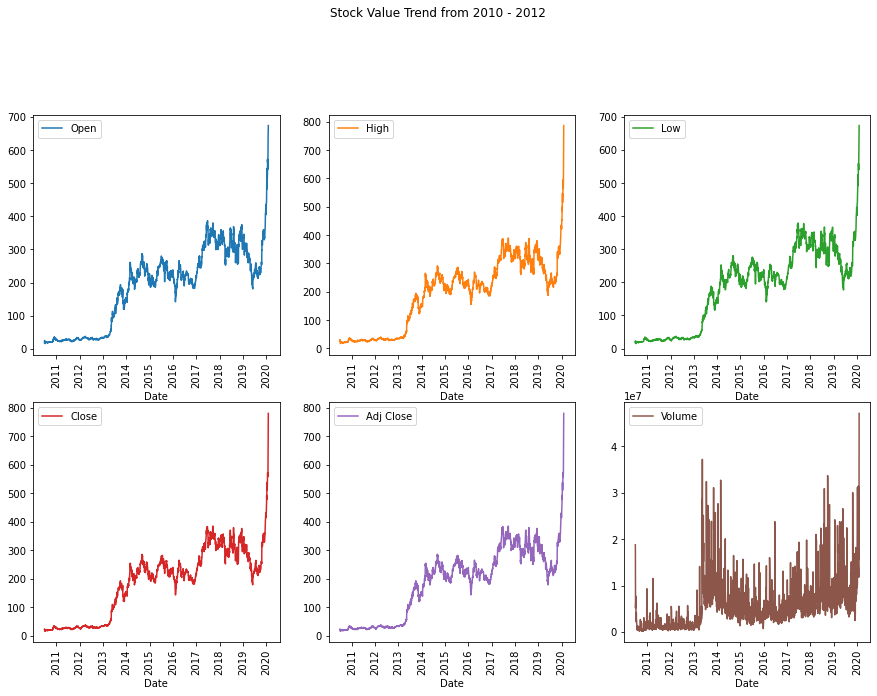

In [267]:
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, 
          title = "Stock Value Trend from 2010 - 2012", rot = 90);

In [268]:
## Creating Price Difference Column
data['PriceDiff']=data['Close']-data['Close'].shift(1)
data['PriceDiff']=data['PriceDiff'].fillna(0)
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,PriceDiff
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,0.000000
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,-0.059999
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010,-1.870001
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,2010,-2.759998
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,2010,-3.090000


In [269]:
data['Daily Return %']=(data['PriceDiff']/data['Close'])*100
data.head().round(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,PriceDiff,Daily Return %
0,2010-06-29,19.00,25.00,17.54,23.89,23.89,18766300,6,2010,0.00,0.000
1,2010-06-30,25.79,30.42,23.30,23.83,23.83,17187100,6,2010,-0.06,-0.252
2,2010-07-01,25.00,25.92,20.27,21.96,21.96,8218800,7,2010,-1.87,-8.515
3,2010-07-02,23.00,23.10,18.71,19.20,19.20,5139800,7,2010,-2.76,-14.375
4,2010-07-06,20.00,20.00,15.83,16.11,16.11,6866900,7,2010,-3.09,-19.181


### First time using Moving average, a little description for beginners as me

In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM). or rolling mean and is a type of finite impulse response filter. Variations include: simple, cumulative, or weighted forms (described below). Highly used for financial analyses.

In [270]:
data['MovingAvg.50']=data['Close'].rolling(50).mean()
data['MovingAvg.50']=data['MovingAvg.50'].fillna(0)
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,PriceDiff,Daily Return %,MovingAvg.50
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,0.000000,0.000000,0.0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,-0.059999,-0.251779,0.0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010,-1.870001,-8.515488,0.0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,2010,-2.759998,-14.374989,0.0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,2010,-3.090000,-19.180632,0.0


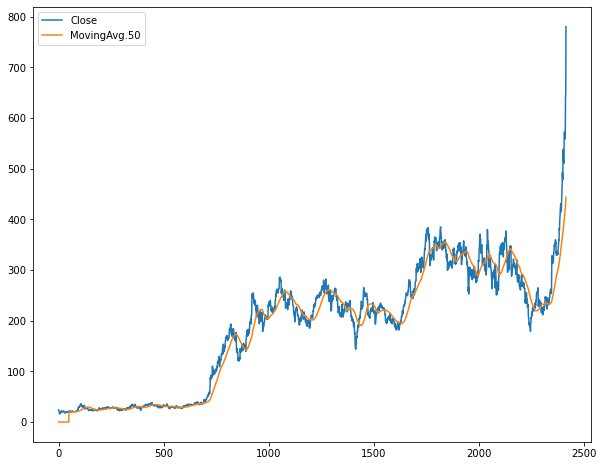

In [271]:
plt.figure(figsize=(10, 8))

data['Close'].plot()
data['MovingAvg.50'].plot()
plt.legend();

The above is a ten years chart of Tesla Stock with simple moving averages. The orange line is the shorter, 5-day moving average. Most traders will use the cross of the short-term moving average above the longer-term moving average to initiate a long position and identify the start of a bullish trend. As we can see there is a growing trend.

In [272]:
data['MovingAvg.10']=data['Close'].rolling(10).mean()
data['MovingAvg.10']=data['MovingAvg.10'].fillna(0)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,PriceDiff,Daily Return %,MovingAvg.50,MovingAvg.10
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,2010,0.000000,0.000000,0.0,0.0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,2010,-0.059999,-0.251779,0.0,0.0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,2010,-1.870001,-8.515488,0.0,0.0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,2010,-2.759998,-14.374989,0.0,0.0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,2010,-3.090000,-19.180632,0.0,0.0
